## How to visualize model data

First step: Let's load some useful libs..if they are missing you can install them

In [11]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import xarray as xr

Now let's load the NetCDF files as:

In [3]:
ncfile = Dataset('../irrigation/aquacrop-rea/test_mean.nc')
ncfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(365), lon(38), lat(36)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float32 e(time, lat, lon), float32 mx2t24(time, lat, lon), float32 mn2t24(time, lat, lon), float32 tp(time, lat, lon), int64 time(time)
    groups: 

In [4]:
ncfile.variables["mx2t24"]

<class 'netCDF4._netCDF4.Variable'>
float32 mx2t24(time, lat, lon)
    _FillValue: nan
unlimited dimensions: time
current shape = (365, 36, 38)
filling on

This way you can access all variables/dimensions and attributes in the netCDF file.

Another way to load the files is through xarray, as:

In [7]:
ds = xr.open_dataset("../irrigation/aquacrop-rea/test_mean.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 38, time: 365)
Coordinates:
  * lon      (lon) float64 -2.0 -1.0 0.0 1.0 2.0 ... 31.0 32.0 33.0 34.0 35.0
  * lat      (lat) float64 35.0 36.0 37.0 38.0 39.0 ... 66.0 67.0 68.0 69.0 70.0
  * time     (time) datetime64[ns] 2022-01-02 2022-01-03 ... 2023-01-01
Data variables:
    e        (time, lat, lon) float32 ...
    mx2t24   (time, lat, lon) float32 ...
    mn2t24   (time, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...

In [8]:
ds.mx2t24

<xarray.DataArray 'mx2t24' (time: 365, lat: 36, lon: 38)>
[499320 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -2.0 -1.0 0.0 1.0 2.0 ... 31.0 32.0 33.0 34.0 35.0
  * lat      (lat) float64 35.0 36.0 37.0 38.0 39.0 ... 66.0 67.0 68.0 69.0 70.0
  * time     (time) datetime64[ns] 2022-01-02 2022-01-03 ... 2023-01-01

See the differences between using these methods! 

Why do we have two? xarray is newer, but now is getting more and more used, also because it makes it easier to do basic operations and save intermediate netCDFs. 

We are going to use this now.

In [12]:
t2_max = ds.mx2t24

<xarray.DataArray 'mx2t24' ()>
array(252.7375946)

Let's try a basic plot now, nothing fancy:

TypeError: Input z must be 2D, not 3D

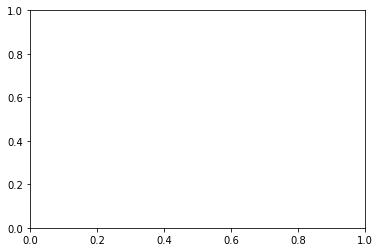

In [14]:
lon = ds.lon
lat = ds.lat
plt.contourf(lon,lat,t2_max)

What went wrong? "TypeError: Input z must be 2D, not 3D" our T2_max has also the temporal dimension, so we must reduce it, e.g.:

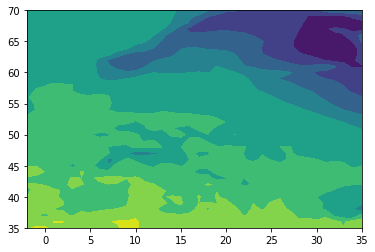

In [15]:
plt.contourf(lon,lat,t2_max[2])

This way we selected only the 3rd timestep in the dataset. While there is nothing fancy in this plot, we can already see the extent of our domain. 

Now play around, possible things to try (easy to difficult):
1. redo the same plot, but for the average over all timesteps
2. extract a specific longitude/latitude, and do a timeserie
3. select a region and plot the average values as a timeserie


If you get bored, try:
1. load the wrf.nc dataset and do the same excercise
2. compare the t2 diurnal maximum and minimum temperatures between wrf.nc and exp1.nc

# Point 1:  average over all timesteps
use either numpy or xarray built-in functions to do so.

In [26]:
# average over all timesteps:
# numpy:
t2_max_mean = np.mean(t2_max,axis=0)
# xarray
t2_max_mean_xr = t2_max.mean(dim="time")

## check if they are the same:
t2_max_mean.values == t2_max_mean_xr.values

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Not so easy to understand if there is one value that is off... there are several ways, e.g.

In [28]:
np.sum(t2_max_mean.values != t2_max_mean_xr.values)

0

Check how many times the elements are not the same.

Now that we are sure it worked:

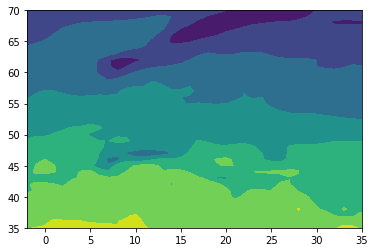

In [29]:
plt.contourf(lon,lat,t2_max_mean_xr)

# Point 2: timeserie of a location

In [36]:
Bonn_lon = 7.07011
Bonn_lat = 50.7300
T2max_bonn = t2_max.sel(lon=Bonn_lon, lat=Bonn_lat, method= "nearest")
T2max_bonn

<xarray.DataArray 'mx2t24' (time: 365)>
array([285.68677, 285.31128, 283.28427, ..., 276.4406 , 276.70706, 277.12796],
      dtype=float32)
Coordinates:
    lon      float64 7.0
    lat      float64 51.0
  * time     (time) datetime64[ns] 2022-01-02 2022-01-03 ... 2023-01-01

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


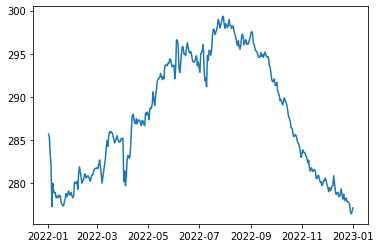

In [37]:
plt.plot(T2max_bonn.time, T2max_bonn)

# Point 3: timeserie of a region

Now plot the timeserie of an area of our domain.

In [59]:
t2max_bonn_region = t2_max.sel(lon=slice(6, 8), lat=slice(49.5,51))
t2max_bonn_region

<xarray.DataArray 'mx2t24' (time: 365, lat: 2, lon: 3)>
array([[[283.24683, 283.58505, 284.38892],
        [286.88916, 285.68677, 283.57315]],

       [[282.86783, 283.2299 , 284.68036],
        [286.01224, 285.31128, 282.8144 ]],

       ...,

       [[276.68204, 276.04343, 275.65247],
        [277.5133 , 276.70706, 276.06198]],

       [[277.23752, 276.6497 , 276.23376],
        [277.88113, 277.12796, 276.50558]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 6.0 7.0 8.0
  * lat      (lat) float64 50.0 51.0
  * time     (time) datetime64[ns] 2022-01-02 2022-01-03 ... 2023-01-01

In [63]:
t2max_bonn_avg = t2max_bonn_region.mean(dim=("lon","lat"))
t2max_bonn_avg

<xarray.DataArray 'mx2t24' (time: 365)>
array([284.56165, 284.15268, 282.3314 , 281.81253, 276.4787 , 278.79837,
       278.1542 , 277.92444, 278.08084, 277.50153, 277.29367, 277.52274,
       277.24887, 277.55884, 277.51865, 276.87094, 276.4653 , 276.28503,
       276.4036 , 276.7771 , 277.07224, 277.65665, 277.45178, 277.80762,
       278.0731 , 277.7101 , 277.70236, 277.98862, 277.64145, 277.40067,
       277.62653, 279.1437 , 279.16623, 279.1577 , 279.1426 , 278.34158,
       280.19205, 281.06372, 280.46942, 279.79736, 279.11594, 279.34192,
       279.60037, 280.10623, 280.1821 , 279.71915, 279.85568, 279.93967,
       279.94498, 279.6028 , 279.3855 , 279.77344, 280.04376, 280.06668,
       280.53616, 280.82953, 280.8265 , 280.9492 , 281.0525 , 280.81384,
       281.14853, 281.84387, 280.93005, 280.02475, 279.32144, 279.84875,
       280.61227, 281.26294, 281.94998, 283.0834 , 284.0145 , 283.48233,
       284.6942 , 285.23935, 284.98407, 285.18735, 285.01328, 284.76776,
       284.44067, 284.00113, 284.26965, 284.57315, 284.89484, 284.21863,
       284.0488 , 284.11716, 284.14075, 284.59036, 284.5153 , 284.4431 ,
       279.65454, 280.33023, 278.5388 , 279.9691 , 282.4011 , 282.5397 ,
       282.38635, 282.45535, 283.385  , 285.64844, 287.13382, 287.36243,
       286.93588, 286.27817, 286.40872, 286.85773, 286.3912 , 286.69113,
       286.74847, 286.79065, 286.38452, 286.08066, 286.70834, 286.54892,
       286.1767 , 286.04868, 287.3264 , 287.27356, 287.57895, 287.33972,
       286.78964, 287.9331 , 288.30222, 288.53568, 288.8386 , 290.014  ,
       289.33047, 288.7371 , 289.73853, 290.13507, 291.05954, 291.2258 ,
       291.3966 , 291.64023, 291.90753, 291.67236, 291.48196, 291.80188,
       291.43256, 292.87598, 292.95825, 292.8988 , 292.90094, 293.17627,
       293.05975, 293.7284 , 293.4766 , 293.2383 , 292.7457 , 292.78708,
       292.86624, 291.9446 , 292.9581 , 296.4487 , 296.2831 , 295.5213 ,
       292.429  , 291.9354 , 293.12198, 294.4358 , 295.30017, 295.121  ,
       294.5438 , 294.46616, 294.336  , 295.25592, 295.7711 , 295.23788,
       294.82938, 294.60226, 294.7147 , 294.41226, 293.84665, 293.63614,
       293.4241 , 293.56873, 293.81644, 294.22046, 293.38937, 293.7487 ,
       292.95804, 292.5571 , 294.62463, 295.21298, 295.69424, 296.63638,
       294.2158 , 292.40317, 292.204  , 291.59073, 295.34555, 294.9403 ,
       295.9568 , 295.97458, 295.29407, 295.74988, 297.58975, 298.38596,
       298.31577, 297.70605, 297.81332, 298.0946 , 298.7178 , 299.33887,
       299.05344, 298.3737 , 298.73917, 299.18307, 299.7529 , 299.79712,
       299.00525, 298.45813, 299.05228, 298.84427, 298.47266, 298.80637,
       299.47354, 298.80283, 298.76697, 298.4613 , 298.80432, 298.74435,
       298.21503, 297.87778, 297.36517, 296.7797 , 296.37918, 296.98273,
       296.23862, 296.00516, 296.59933, 297.56747, 297.7743 , 297.1536 ,
       296.56897, 296.91068, 297.04282, 296.50388, 296.60815, 296.54974,
       296.9664 , 297.26358, 297.7667 , 298.0311 , 297.647  , 296.61865,
       296.44055, 295.87354, 295.7173 , 295.66614, 295.4351 , 295.06165,
       294.82425, 294.84753, 295.3226 , 295.0472 , 295.13882, 294.9451 ,
       295.35553, 295.47684, 295.15344, 294.89536, 294.8412 , 294.91312,
       293.7803 , 293.62143, 292.9267 , 292.0819 , 291.7902 , 291.9116 ,
       292.18448, 291.42294, 291.5192 , 291.72958, 290.8538 , 290.59512,
       290.31174, 289.70526, 289.76315, 289.5062 , 289.05728, 289.50372,
       289.92142, 289.6679 , 289.3995 , 289.01883, 288.4596 , 287.81766,
       287.54517, 287.15414, 286.3999 , 286.32724, 285.94894, 285.32755,
       285.3522 , 285.5543 , 285.42874, 285.04227, 284.58   , 284.40115,
       284.08673, 283.58002, 282.77383, 283.14795, 283.67703, 283.3842 ,
       283.37552, 283.2983 , 282.9835 , 282.64554, 282.07352, 282.44034,
       281.58856, 281.105  , 281.54745, 281.37286, 281.1673 , 281.29263,
       281.39352, 281.24478, 280.32718, 280.3207 , 280.64536, 280.68936,
       280.30127, 

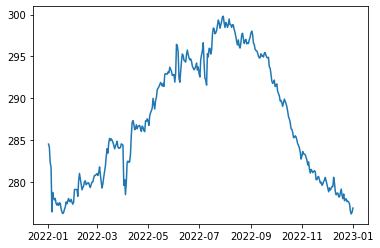

In [64]:
plt.plot(t2max_bonn_avg.time,t2max_bonn_avg)

Now, let's compare it with the results of only Bonn (point 2)

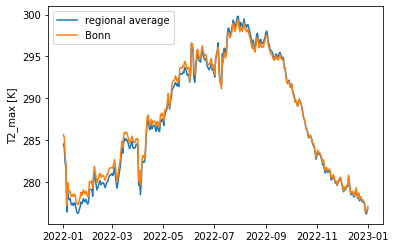

In [67]:
plt.plot(t2max_bonn_avg.time,t2max_bonn_avg, label="regional average")
plt.plot(T2max_bonn.time, T2max_bonn, label="Bonn")
plt.ylabel("T2_max [K]")
plt.legend()

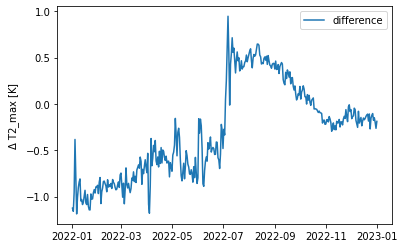

In [69]:
plt.plot(t2max_bonn_avg.time,t2max_bonn_avg-T2max_bonn,label = "difference")
plt.ylabel(r'$\Delta$ T2_max [K]')
plt.legend()